# Before we start...
This tutorial is designed to be fairly casual. There often is not one 'correct' way to write code so I believe the best way to learn is to play around and explore rather than focus on getting the 'right' answer. These exercises are meant to be a guide so feel free to ask questions, lookup documentation, and explore NumPy as we progress. I have also added several "bonus" exercises to encourage exactly that. I probably won't go over these in the interest of time but if you would like to please just ask and I will be happy to explore with you.

# Why NumPy and NumPy arrays?
- A way to represent multi-dimensional arrays (i.e. vectors, matrices, images, tables, tensors, etc.) in Python
- Fast operations on such multi-dimensional arrays (a.k.a vectorized operations)   
- Used by many other python packages such as pandas and astropy

   
     
In this tutorial, we will learn how to use NumPy by going through various examples from Physics and Astronomy. The focus is on learning by doing. It is not possible to cover everything in a tutorial, feel free to refer to the [numpy documentation](https://numpy.org/doc/stable/) and Google things. 
To start, lets import NumPy. The recommended way is:

In [1]:
import numpy as np

Let's start by testing numpy's speed. We can do this using the python magic command timeit. For example, without the use of numpy, how would you find the cube root of every integer between 0 and 100?

In [2]:
%%timeit

### INSTERT CODE HERE ###

cbrt = [i**(1./3.) for i in range(100)]

12.5 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now let's try it using NumPy. Run the example code below to time the same opperation using numpy arrays. How do the two methods compare?

In [3]:
%%timeit

arr = np.arange(0,100)
cbrt = arr**(1./3.)

4.92 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now imagine doing hundreds, thousands, or even millions of calculations. This difference will really add up! But why is numpy so fast anyways? There are a few reasons for this:
1. Arrays contain data of the same type and are stored together allowing for easy access.
  
2. NumPy breaks down calculations and computes them in parallel. 
  
3. NumPy uses precompiled C, C++, and Fortran code. These languages are much faster than python. 
  

## Representing positions of particles using arrays
### Creating an array

The position of a particle in 3D is represented by a collection of three numbers. We can create a NumPy array to store it's coordinates ($x,y,z$). Note that all elements in the array must be of the same type. This characteristic is part of what makes NumPy so fast.

In [4]:
pos_1 = np.array([1,2,3])

We can print out the array and check its type to see what has been stored.

In [5]:
print(pos_1)

[1 2 3]


In [6]:
type(pos_1)

numpy.ndarray

Now store the position of another particle which is located at coordinates $(4,5,6)$

In [7]:
pos_2 = np.array([4,5,6])         # COMPLETE THIS LINE OF CODE

NumPy takes advantage of object orriented code. NumPy arrays are Python objects and have "attributes" associated with them. Attributes are properties contained in the object. For example, the `ndim` and `shape` attributes can be used to check the number of dimensions and the shape of the array. Python objects also have "methods" which are functions that act on the object. We will discuss these later.

In [8]:
pos_1.ndim

1

In [9]:
pos_1.shape

(3,)

The above shape indicates that there's only one dimension to the array and there are 3 elements. In NumPy terminology the space of numbers required to denote the index of an element is called an `axis` and the total number of such axes is called the `dimension`.

An object which has 1 dimension is like a vector while an object with 2 dimensions is like a matrix. This idea is generalized to get an `n-dimensional` array, i.e. the location of an element in that array needs to be denoted by specifying `n` numbers (i.e. axes). Check out another array attribute, `dtype`, which tells the type of data the array holds.

In [10]:
pos_1.dtype         # COMPLETE THIS LINE OF CODE

dtype('int64')

Similar to lists the `len()` function can be used to check out the length of 1-D arrays.

In [11]:
len(pos_1)                                      # COMPLETE THIS LINE OF CODE

3

### Indexing: Accessing elements of an array
Indexing a one dimensional array follows the same syntax as that of lists (i.e. the first element has an index of `0` while the last element has an index of `len(array)-1` and proceeds in steps of 1). If you want to count from the end of an array the last element has an index of `-1`, the second last `-2`, and so on.
So, for example if we want to access the $x$ coordinate of the first particle:

In [12]:
pos_1[0]

1

Calculate the sum of the $y$ and $z$ coordinates of the second particle (i.e. `pos_2`)

In [13]:
pos_2[1] + pos_2[2] # COMPLETE THIS LINE OF CODE

11

**BONUS:** Can you guess what would happen if we added the two arrays without accessing elements? Try it below!

In [14]:
## INSERT CODE HERE ##
pos_2 + pos_2

array([ 8, 10, 12])

### Automatically generating arrays
Sometimes it is useful to automatically generate an array of a given length. Some common ways to do these are the functions: `np.ones`, `np.zeros`, `np.arange`, `np.linspace` and `np.logspace`. Let's check the documentation for `np.zeros` and `np.ones` by typing `?` after the function name:  
(Also when using jupyter the documentation can also be accessed by pressing `Shift`+`tab` after typing the function name, i.e. `np.zeros` -> `Shift`+`tab`) 

In [15]:
np.ones?

**BONUS:** Can you make an array that has one hundred elements all equal to 5?

In [16]:
## INSERT CODE HERE ##
np.ones(100)*5

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

`np.arange` returns evenly spaced values within a given interval. Let's check the documentation for `np.arange`.

In [17]:
np.arange?

How can we use np.arange to generate an array whose elements are between 0 to 100 and increase in steps of 10?

In [18]:
## INSERT CODE HERE ##
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Now look up the documentation for `np.linspace` and generate the same array we generated above using `np.linspace`. What is the difference between `np.arange` and `np.linspace`?

In [19]:
## INSERT CODE HERE ##
np.linspace(0, 90, 10)

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

**BONUS:** Lookup the documentation for `np.logspace` and create an array using this function. When might this type of array be useful?

In [20]:
## INSERT CODE HERE ##
np.logspace?

**Random Arrays:** We can also generate arrays whose elements are random numbers following a specific distribution. The `np.random` module contains a number of functions that can be used to this effect. The following will create a one dimensional array with 5 samples drawn from a standard normal distribution. More such functions can be found in the [documentation](https://numpy.org/doc/stable/reference/random/legacy.html#legacy).

In [21]:
np.random.randn(5)

array([-0.91092233,  1.20978789, -0.49642374,  0.17780986, -0.65011393])

### Slicing: Extracting chunks of an array

We can extract smaller arrays from a longer array, the syntax is `array[start_index:stop_index]`. An important note is that the returned array will **include** the element corresponding to the `start_index` and **exclude** the element corresponding to the `stop_index`, i.e. it will end at `stop_index-1`. For example, lets generate an array with 100 elements

In [22]:
big_array = np.arange(100)

**NOTE:** In addition to the usage of `np.arange` shown previously, if you put only an integer as the argument of `np.arange`, it will return an array of integers starting from `0` and of length equal to the argument.  

To get a smaller slice of `big_array` beginning at the index `20` and ending at the index `50-1` we do:

In [23]:
big_array[20:50]

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [24]:
big_array[20:50:2]

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48])

The syntax is `array[start_index:stop_index:step]` can be used to get a slice of an array where the elements are selected in units of `step`. If no `step` is provided, it is assumed to be 1 and hence all elements are returned in the given range.    

So, if we want to extract the sequence `[65, 68, 71, 74, 77, 80, 83]` from `big_array`, what should we do? 

In [25]:
big_array[65:84:3]    # COMPLETE THIS LINE OF CODE

array([65, 68, 71, 74, 77, 80, 83])

**BONUS:** What happens when we change the `stop_index` above to `85`? What about `87`? Why?

In [26]:
## INSERT CODE HERE ##
print(big_array[65:85:3])
print(big_array[65:87:3])

[65 68 71 74 77 80 83]
[65 68 71 74 77 80 83 86]


**Note:** Doing `big_array[:]` is equivalent to selecting the whole array. The elements of an array can be reversed by selecting the whole array and having a step of `-1`. Try it below!

In [27]:
### INSERT CODE HERE ##
big_array[::-1]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

## Numerical operations on arrays  
### Element wise binary operations

All Python binary operations i.e. `+`,`-`,`*`,`/`and`**` work on arrays too! Note that these operators are aliases for numpy functions. For example, we can write 

In [28]:
3*pos_1

array([3, 6, 9])

which is equivalent to

In [29]:
np.multiply(3, pos_1)

array([3, 6, 9])

Now try squaring each coordinate of particle 2. Try using the numpy function as well as it's alias to complete the operation.

In [30]:
## INSERT CODE HERE ##
print(pos_2**2)
print(np.power(pos_2,2))

[16 25 36]
[16 25 36]


All these operations are done element wise on NumPy arrays. What does element wise mean?

Type answer by double clicking on this text:
  
  

If two arrays are of **same shape** then all these binary operations are performed between elements in the same index for both the arrays. For example let's add the positions of two vectors (*note that we performed this operation in an earlier bonus question*).

In [31]:
pos_1 + pos_2

array([5, 7, 9])

What happens if we exponentiate the elements of the first array to the power of the elemnts of the second array?  

In [32]:
## INSERT CODE HERE ##
pos_1**pos_2

array([  1,  32, 729])

What happens if we try to do such operations between arrays of different shapes?  
A short answer is it may or may not give you an error!! We will look into this in the next part of the tutorial.  
  
**BONUS:** Try this out below.

In [33]:
## INSERT CODE HERE
arr_1 = np.array([1,2,3])
arr_2 = np.array([4,5])
arr_1 ** arr_2

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

### Other mathematical functions

Numpy has a host of built in mathematical functions which also operate element wise. These functions are generally faster than using loops to calculate the value of the function on each element. Let's see this in action by calculating the $\sin$ of an array using traditional python and also NumPy. We will measure the runtime using the `%%timeit` magic command.

In [46]:
from math import sin

In [47]:
%%timeit

vals = [i for i in range(10000)] # Create a list of 10,000 integers starting with 0
sin_vals = [sin(i) for i in vals] # Use a for loop to calculate the sin of each integers

1.47 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**NOTE:** The above way of using `for` loop to generate a list is called list comprehension. So this line of code
```python
numbers = [2*i for i in range(100)]
```
is equivalent to doing
```python
numbers = []
for i in range(100):
    numbers.append(2*i)
```
Both achieve the same thing, the former is the more "pythonic" way.

In [48]:
%%timeit

vals = np.arange(10000)
sin_vals = np.sin(vals)

157 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As seen above we can use the NumPy `sin` function which takes an array as its input. Almost all common mathematical functions are implemented as native numpy functions. A complete list can be found [here](https://numpy.org/doc/stable/reference/routines.math.html?highlight=mathematical%20functions).
   
We can see a huge improvement in runtime when using NumPy over barbones Python. This is because NumPy functions (aka `ufuncs`) are implemented in other compiled languages like C or Fortran and made available to be used in Python. Whenever possible it is recommended to use NumPy's inbuilt data structures and functions. These implementations are also called **vectorized** functions. Vectorization is a theme we will visit many times in this tutorial.    


**NOTE:** Though they might look very similar Python `lists` are completely different objects than Numpy arrays. `list` is a native Python data type while NumPy arrays are not. Attributes and methods of lists like `.append()` do not work on NumPy arrays and vice versa. Moreover the elements of a list can each be of a different data type, for example
```python
example_list = [2.0, 1, "A sentence"]
```
is a list which has a `float`, an `int` and a `str` as its element. This is not possible in a NumPy array. All the elements need to be of the same datatype.
  
### Plotting $\sin(x)$

Let's try this out by plotting $\sin(x)$ between $0$ and $2\pi$. The first step is to define a NumPy array for x. (*Hint: Google how to define $\pi$ using NumPy.*)

In [49]:
## INSERT CODE HERE ##
x = np.linspace(0, 2.*np.pi)

Next, we define the array for $\sin(x)$.

In [50]:
## INSERT CODE HERE ##
y = np.sin(x)

Finally, use the matplotlib skills you learned yesterday to plot! 

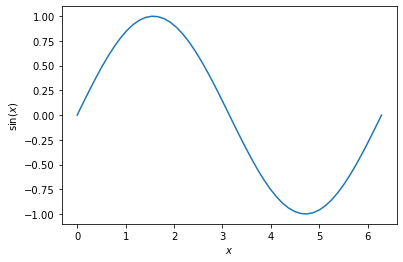

In [51]:
## INSERT CODE HERE ##
import matplotlib.pyplot as plt
plt.figure()
plt.ylabel(r'$\sin(x)$')
plt.xlabel(r'$x$')
plt.plot(x,y)

### Array Methods
Like all other data structures in Python, NumPy arrays are objects. These objects have methods associated with them.   
Recall that methods are just like functions but are associated with an object. Whereas functions take an object as an input and return another object as the output, methods act on the object they are associated with and may alter the object itself. Here's an example, the `array.sum()` **method** returns the sum of all the elements of the array. The `np.sum()` **function** takes an array as its input and returns the sum of its elements as outputs. Both do the same thing but are accessed in different ways. A complete lists of methods and attributes associated with any NumPy array can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

In [52]:
pos_1.sum()

6

In [53]:
np.sum(pos_1)

6

## Plotting the galaxy luminosity function

The number density of galaxies having a given luminosity $(\Phi(L))$ is found to follow the functional form
$$ \Phi(L)=\left( \dfrac{\Phi^*}{L^*} \right) \left( \dfrac{L}{L^*} \right)^{\alpha}10^{\left(-\dfrac{L}{L^*}\right)}$$

Assuming the normalization constant $\left( \dfrac{\Phi^*}{L^*} \right)$ to be unity and $\alpha = -1.5, -1.0 \text{ and} -0.5$,  plot $\log(\Phi(L))$ versus $\dfrac{L}{L^*}$. Follow these steps:

Take a look at the documentation for `np.logspace`. Generate the $x$ axis (i.e.$\dfrac{L}{L^*}$ ) as a logarithmically spaced grid of 50 data points between $10^{-2}$ and $10$.

In [54]:
## INSERT CODE HERE ##
l = np.logspace(-2,1,50)

Use NumPy functions and binary operations on the above array to generate the y axis (i.e. $\log(\Phi(L))$). The function to take the logarithm with a base 10 in numpy is `np.log10` whereas the function to take the natural logarithm is `np.log`.   

Since we are doing the same operation thrice for different input parameters, it is really helpful to define a function. 

In [55]:
def log_phi(l, alpha):
    """
    Function to calculate the log of luminosity function
    
    Arguments:
    l (array): Values of L/L^star
    alpha (float): Faint end slope parameter
    
    Returns:
    array: The log of the luminosity function
    """
    
    # COMPLETE THESE THREE LINES OF CODE
    phi = l**alpha * 10**-l
    log_phi = np.log10(phi)
    
    return log_phi

**NOTE:** The chunk of commented text following the function definition is called a docstring. It is a good practice to always add a doctring whenever you define a function and intend to reuse it.

The following is an example of a very basic docstring. 

```python
def a_generic_function(input1, input2):
    """
    This is what the funtion does
    
    Arguments:
    input1 (data_type): Meaning of the input
    
    
    Returns
    data_type: Meaning of the return value
    
    """
    
    return something
```

There are multiple formatting schemes for doctsrings. The one followed by the Scientific Python community can be found [here](https://docs.scipy.org/doc/numpy/docs/howto_document.html).  

This docstring can be accessed using the usual methods of accessing the documentation for any function imported from a library. Access the docstring for the function we defined in the previous cell:

In [56]:
log_phi                       # COMPLETE THIS LINE OF CODE

<function __main__.log_phi(l, alpha)>

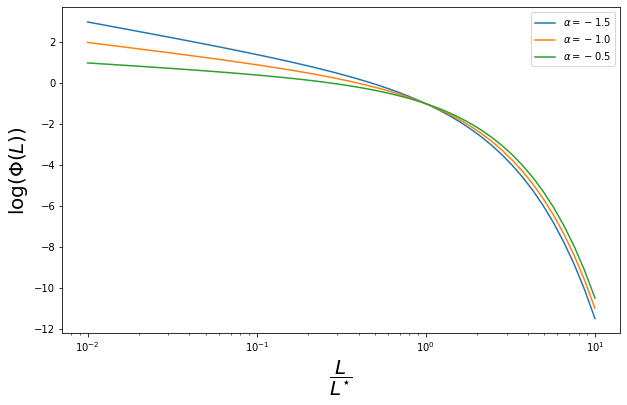

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))


# COMPLETE THESE THREE LINES OF CODE

plt.plot(l,log_phi(l, -1.5),label=r"$\alpha=-1.5$") # for alpha = -1.5
plt.plot(l, log_phi(l, -1.0),label=r"$\alpha=-1.0$") # for alpha = -1.0
plt.plot(l, log_phi(l, -0.5),label=r"$\alpha=-0.5$") # for alpha = -0.5



plt.xlabel(r"$\dfrac{L}{L^{\star}}$", fontsize=20) # Print the x label in latex
plt.ylabel(r"$\log(\Phi(L))$", fontsize=20) # Print the x label in latex
plt.xscale("log") # Set the spacing in the x axis logarithmically
plt.legend()